In [1]:
#ایمپورت کردن بسته های مورد نیاز
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [2]:
my_data = pd.read_csv("drug200.txt", delimiter=",")
my_data[0:5]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


##### یه نگاهی به دیتاست بندازیم

In [3]:
my_data.shape

(200, 6)

# اینجا هم برای کار کردن از نامپای استفاده میکنیم و پانداز رو میندازیم دور

In [4]:
# همونطور که میبینیم دوباره ایکس ها رو از ایگرگ (نتیجه نهایی) جدا میکنیم

X = my_data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

# pandas.get_dummies()
# نکته مهم اینجا این است که سایکیت لرن با اعداد سروکار دارد اما بعضی از داده های ما عددی نیستند
## پس باید این داده ها (از قبیل جنسیت، بالا یا پایین بودن بودن فشار خون و . . .) به صوت عددی کدینگ شوند


In [5]:
from sklearn import preprocessing

le_sex = preprocessing.LabelEncoder() #labelEncoder
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1]) 

# لیبل انکودر از صفر تا تعداد کلاسها منهای یک پیش میرود و کدینگ انجام میدهد
# مثلا در مورد بالا از صفر تا یک و در پایین (فشار خون) از صفر تا ۲ کدینگ میکند

le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3])

In [6]:
# برای اطمینان از کدینگ داده ها به انها نگاهی بکنیم

X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [7]:
# ایگرگ رو هم که قرار بود جدا کنیم
y = my_data["Drug"]
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

# Setting up the Decision Tree

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)
# میبینیم که 70 درصد داده ها را برای ترین استفاده کرده است

In [10]:
print('Shape of X training set {}'.format(X_trainset.shape),'&',' Size of Y training set {}'.format(y_trainset.shape))

Shape of X training set (140, 5) &  Size of Y training set (140,)


In [11]:
print('Shape of X training set {}'.format(X_testset.shape),'&',' Size of Y training set {}'.format(y_testset.shape))

Shape of X training set (60, 5) &  Size of Y training set (60,)


# Modeling (8:20)

In [12]:
#Inside of the classifier, specify criterion="entropy" so we can see the information gain of each node.

drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
# اگه خاطرمون باشه از سایکیت لرن دسیژن تری کلسیفایر رو ایمپورت کردیم بالای صفحه و اینجا استفاده ش کردیم

drugTree # it shows the default parameters


DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [13]:
# حالا میریم سراغ فیت کردن بر اساس داده های ترین
drugTree.fit(X_trainset,y_trainset)


DecisionTreeClassifier(criterion='entropy', max_depth=4)

# Prediction
* Let's make some predictions on the testing dataset and store it into a variable called predTree.

In [14]:
predTree = drugTree.predict(X_testset)

In [15]:
# حالا یه نگاهی بکنیم ببینیم پیش بینی ها تا چه حد درست هستند

print (predTree [0:5])
print (y_testset [0:5])

['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


In [16]:
# میبینیم که خوب پیش بینی کرده

# Evaluation

In [17]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.9833333333333333


# Visualization

In [19]:
pip install pydotplus

  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24575 sha256=567630c79d0e217e323db71f818ffc048326af9e7db882c4b120ba1045778dcb
  Stored in directory: c:\users\mohammad\appdata\local\pip\cache\wheels\89\e5\de\6966007cf223872eedfbebbe0e074534e72e9128c8fd4b55eb
Successfully built pydotplus
Note: you may need to restart the kernel to use updated packages.


In [21]:
pip install python-graphviz

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement python-graphviz (from versions: none)
ERROR: No matching distribution found for python-graphviz


In [26]:
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

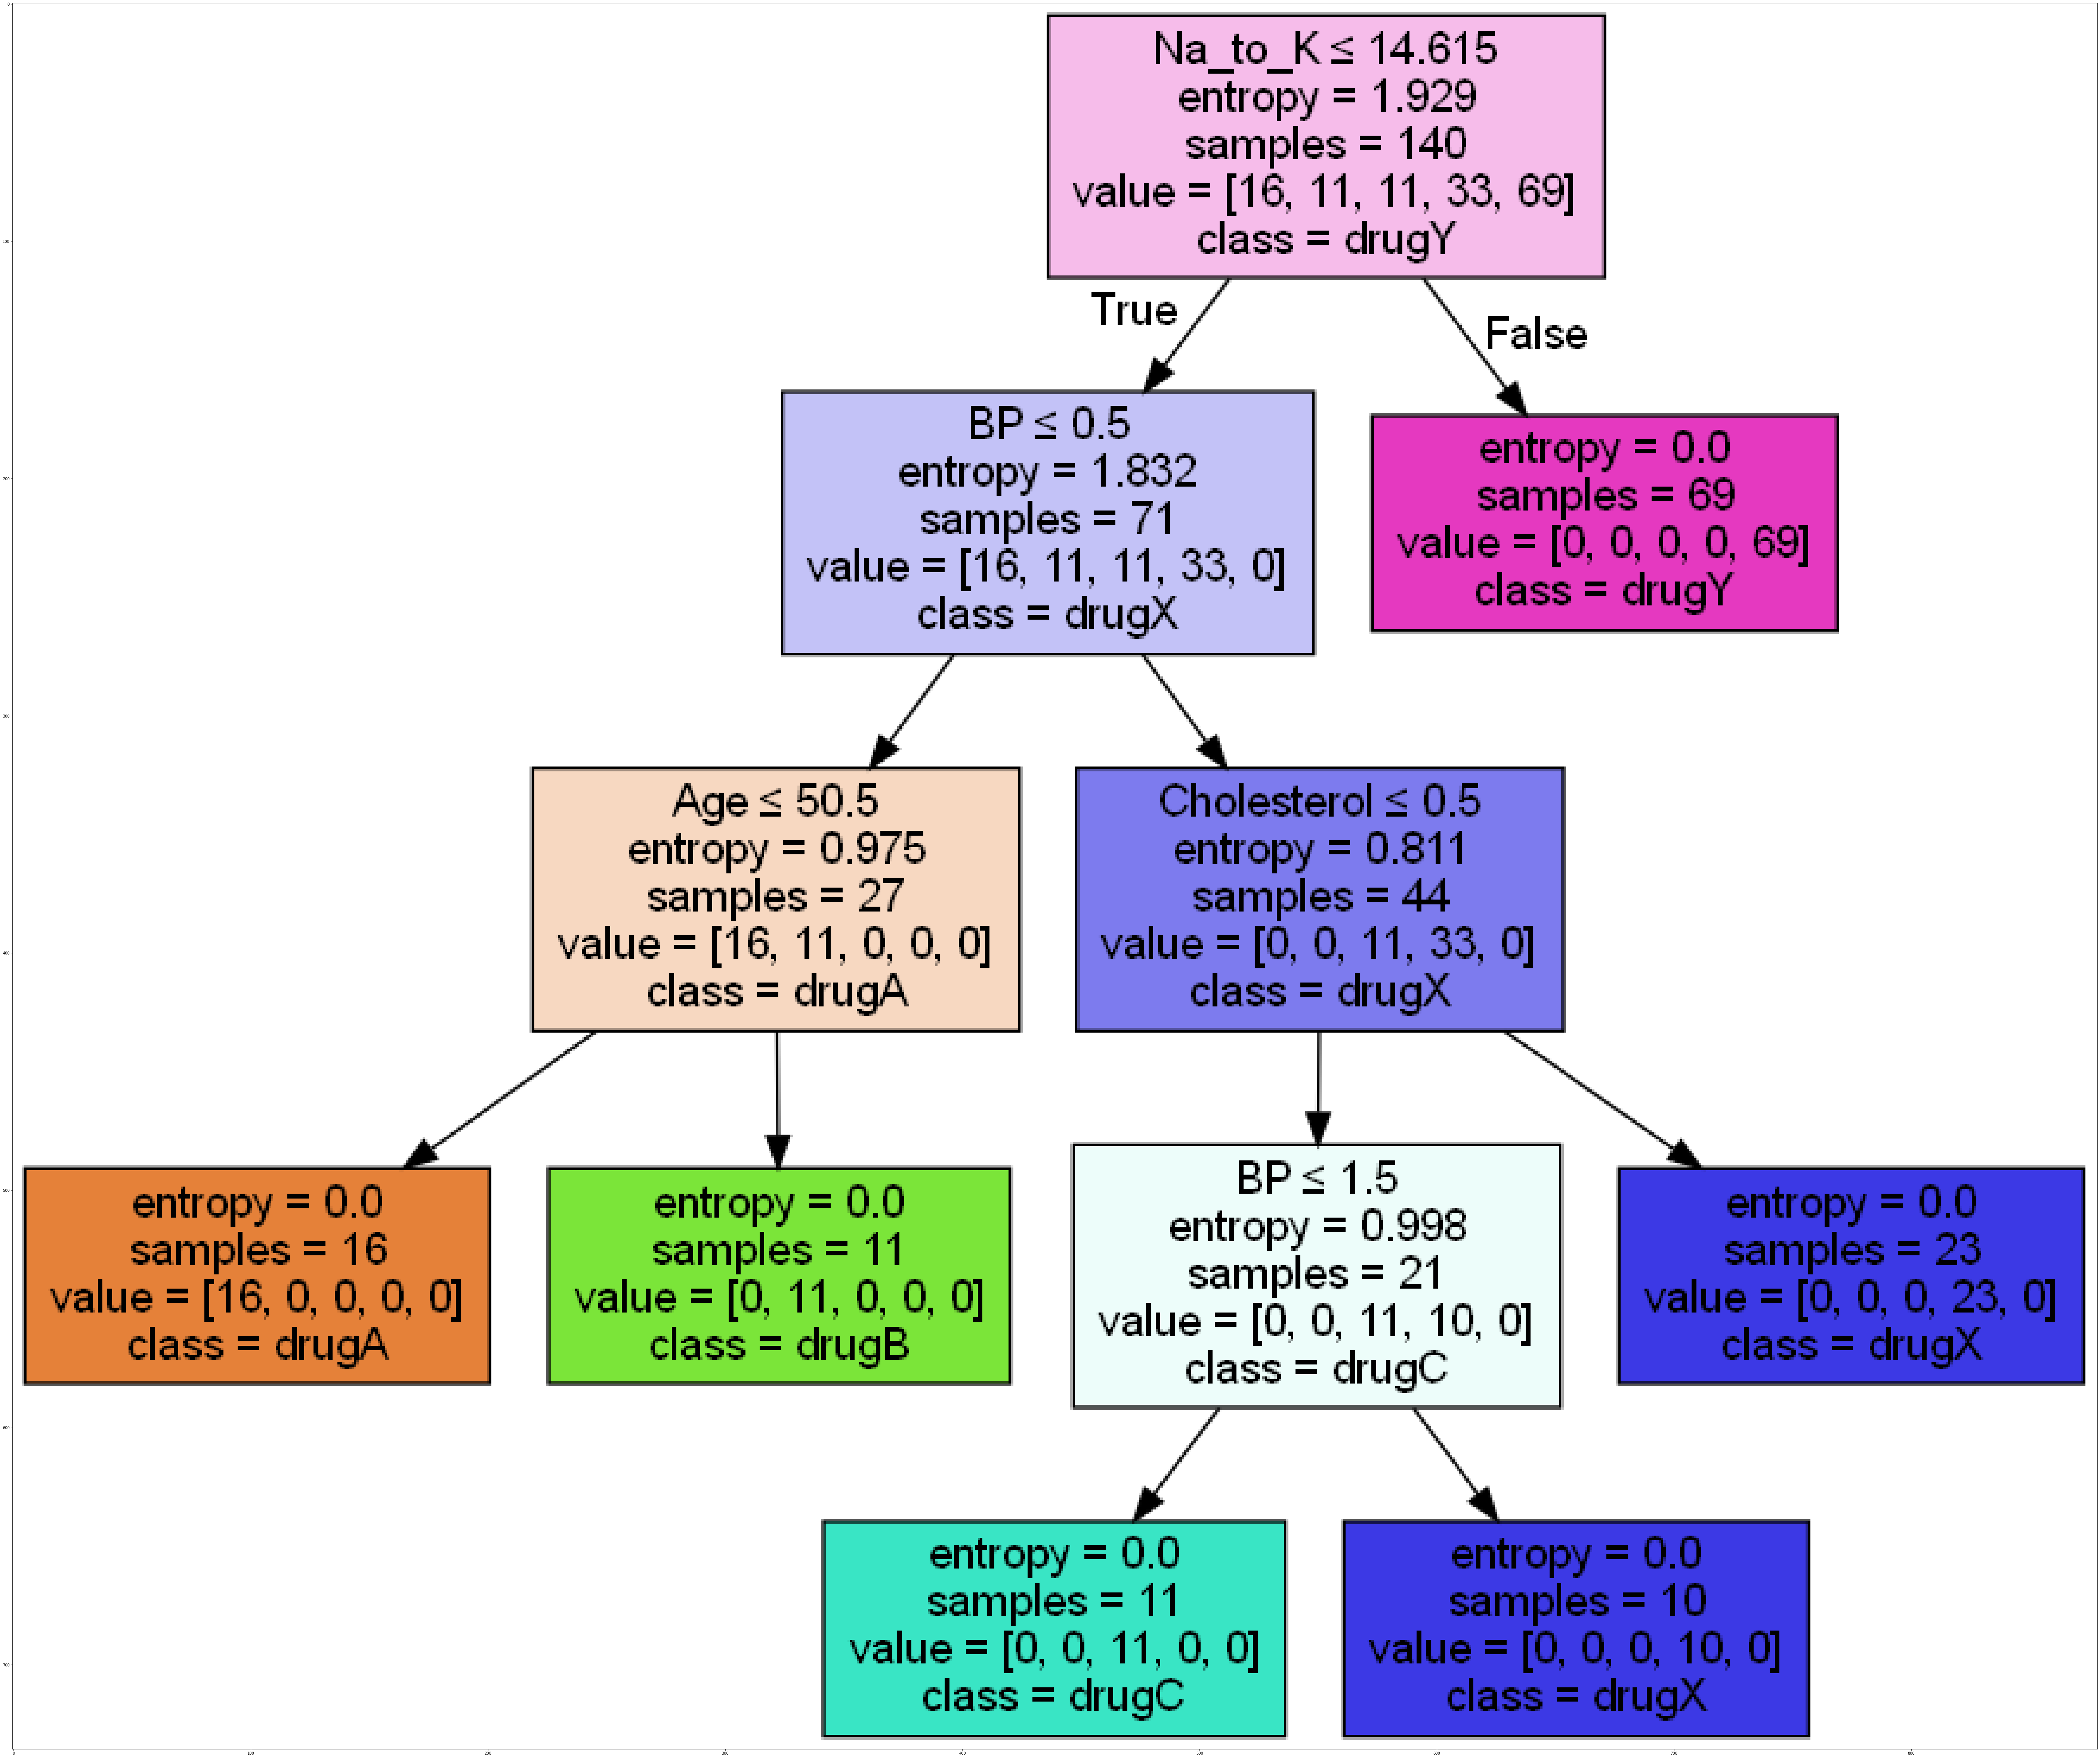

In [27]:
dot_data = StringIO()
filename = "drugtree.png"
featureNames = my_data.columns[0:5]
out=tree.export_graphviz(drugTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')